In [15]:
!nvidia-smi

Wed Jan 22 07:58:01 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.5     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A5000               Off | 00000000:65:00.0 Off |                  Off |
| 30%   43C    P8              19W / 230W |   2968MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [16]:
import os, cv2, numpy
HOME = os.getcwd()
print(HOME)
print(numpy.__version__)

/workspace/stage1A/imane_test
1.26.4


In [17]:
!git clone https://github.com/ultralytics/ultralytics
%pip install -qe ultralytics

fatal: destination path 'ultralytics' already exists and is not an empty directory.
Note: you may need to restart the kernel to use updated packages.


In [18]:
#%cd ultralytics/
from IPython.display import display, Image

In [19]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/workspace/stage1A/imane_test/datasets"

In [27]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5jXjahU4HOjPFMAIbync")
project = rf.workspace("stage-ykecb").project("tronc-p3")
version = project.version(6)
dataset = version.download("yolov8")
                
                

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
loading Roboflow workspace...
loading Roboflow project...


In [34]:
!ls {dataset.location}

README.roboflow.txt  data.yaml	test  train  valid


In [29]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

/workspace/stage1A/imane_test
100%|██████████████████████████████████████| 22.8M/22.8M [00:00<00:00, 57.7MB/s]
Ultralytics 8.3.65 🚀 Python-3.10.12 torch-2.4.0a0+f70bd71a48.nv24.06 CUDA:0 (NVIDIA RTX A5000, 24240MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/workspace/stage1A/imane_test/datasets/tronc-p3-6/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fal

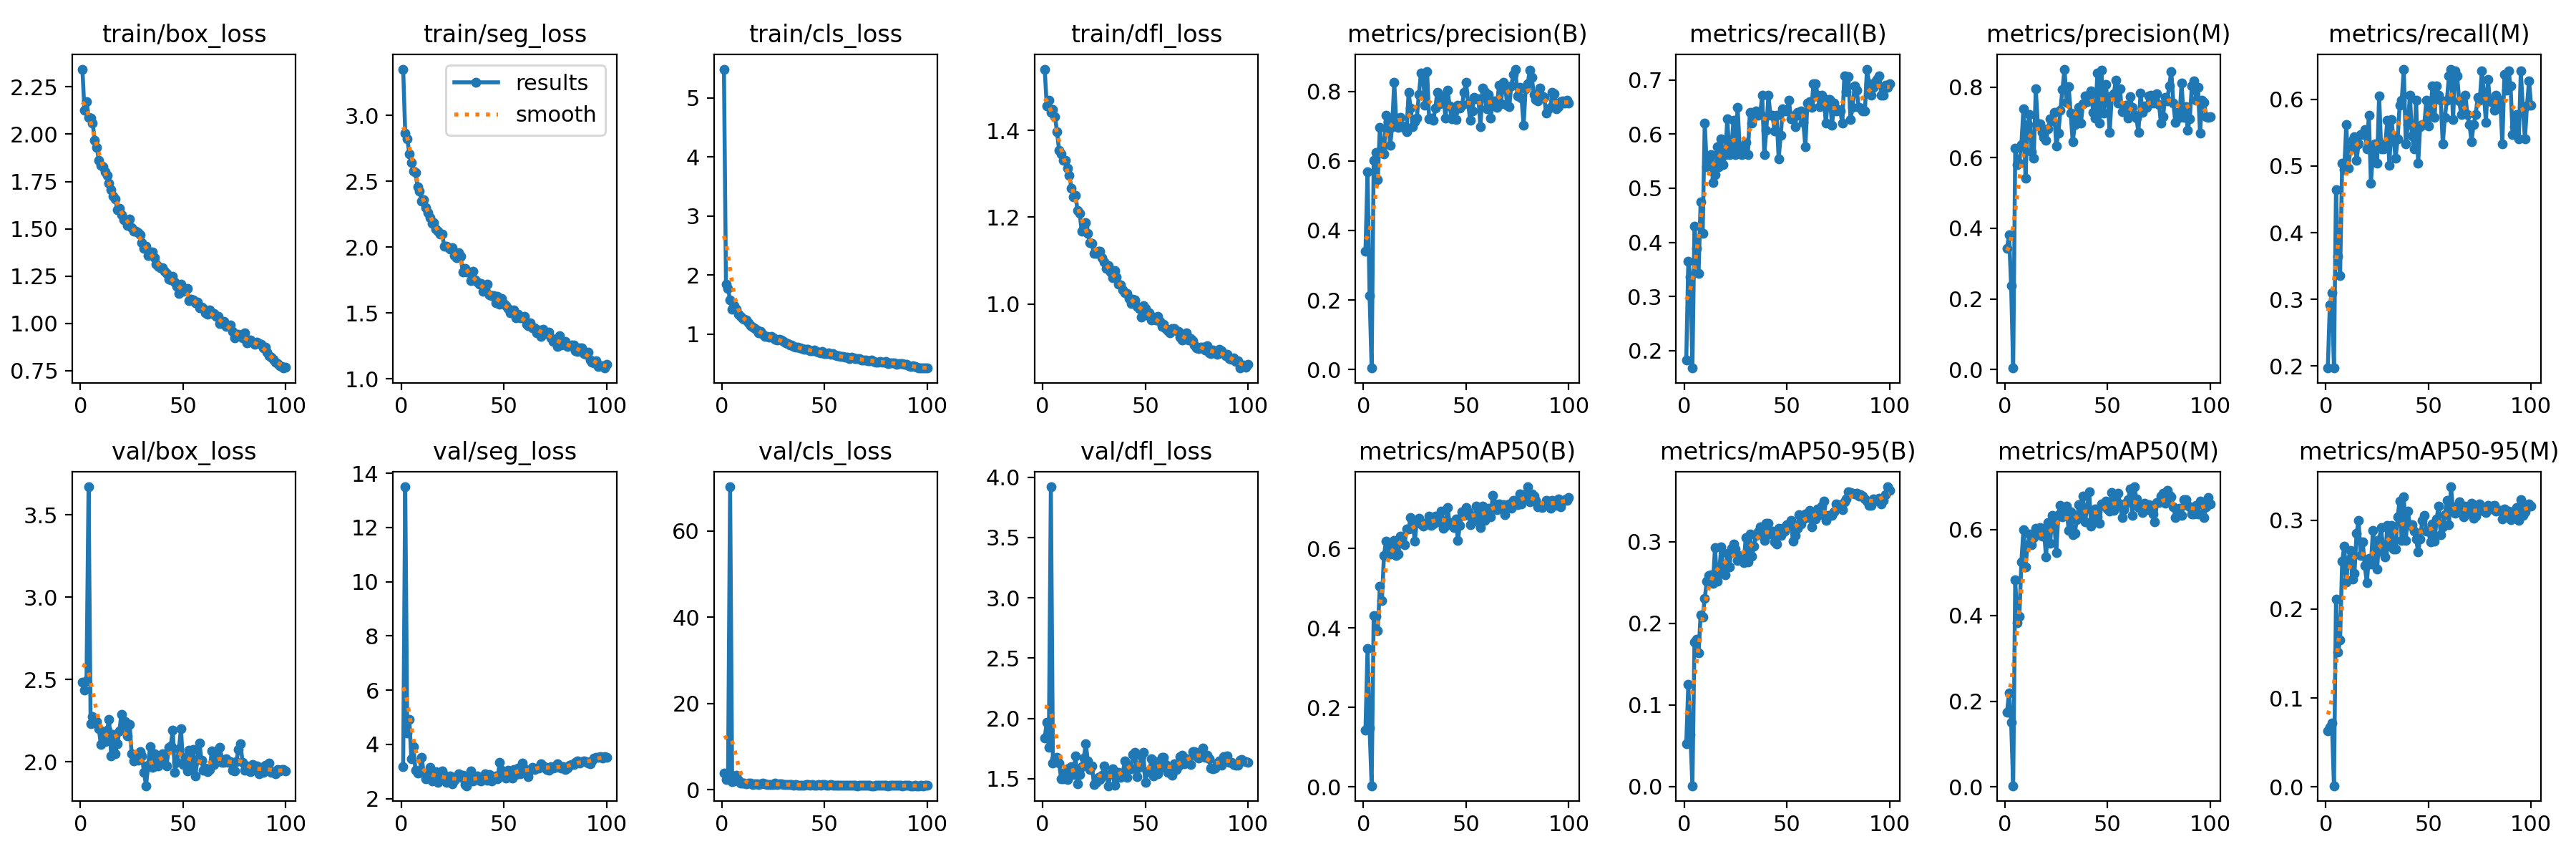

In [30]:

Image(filename='/workspace/stage1A/imane_test/ultralytics/runs/segment/train14/results.png', width=600)

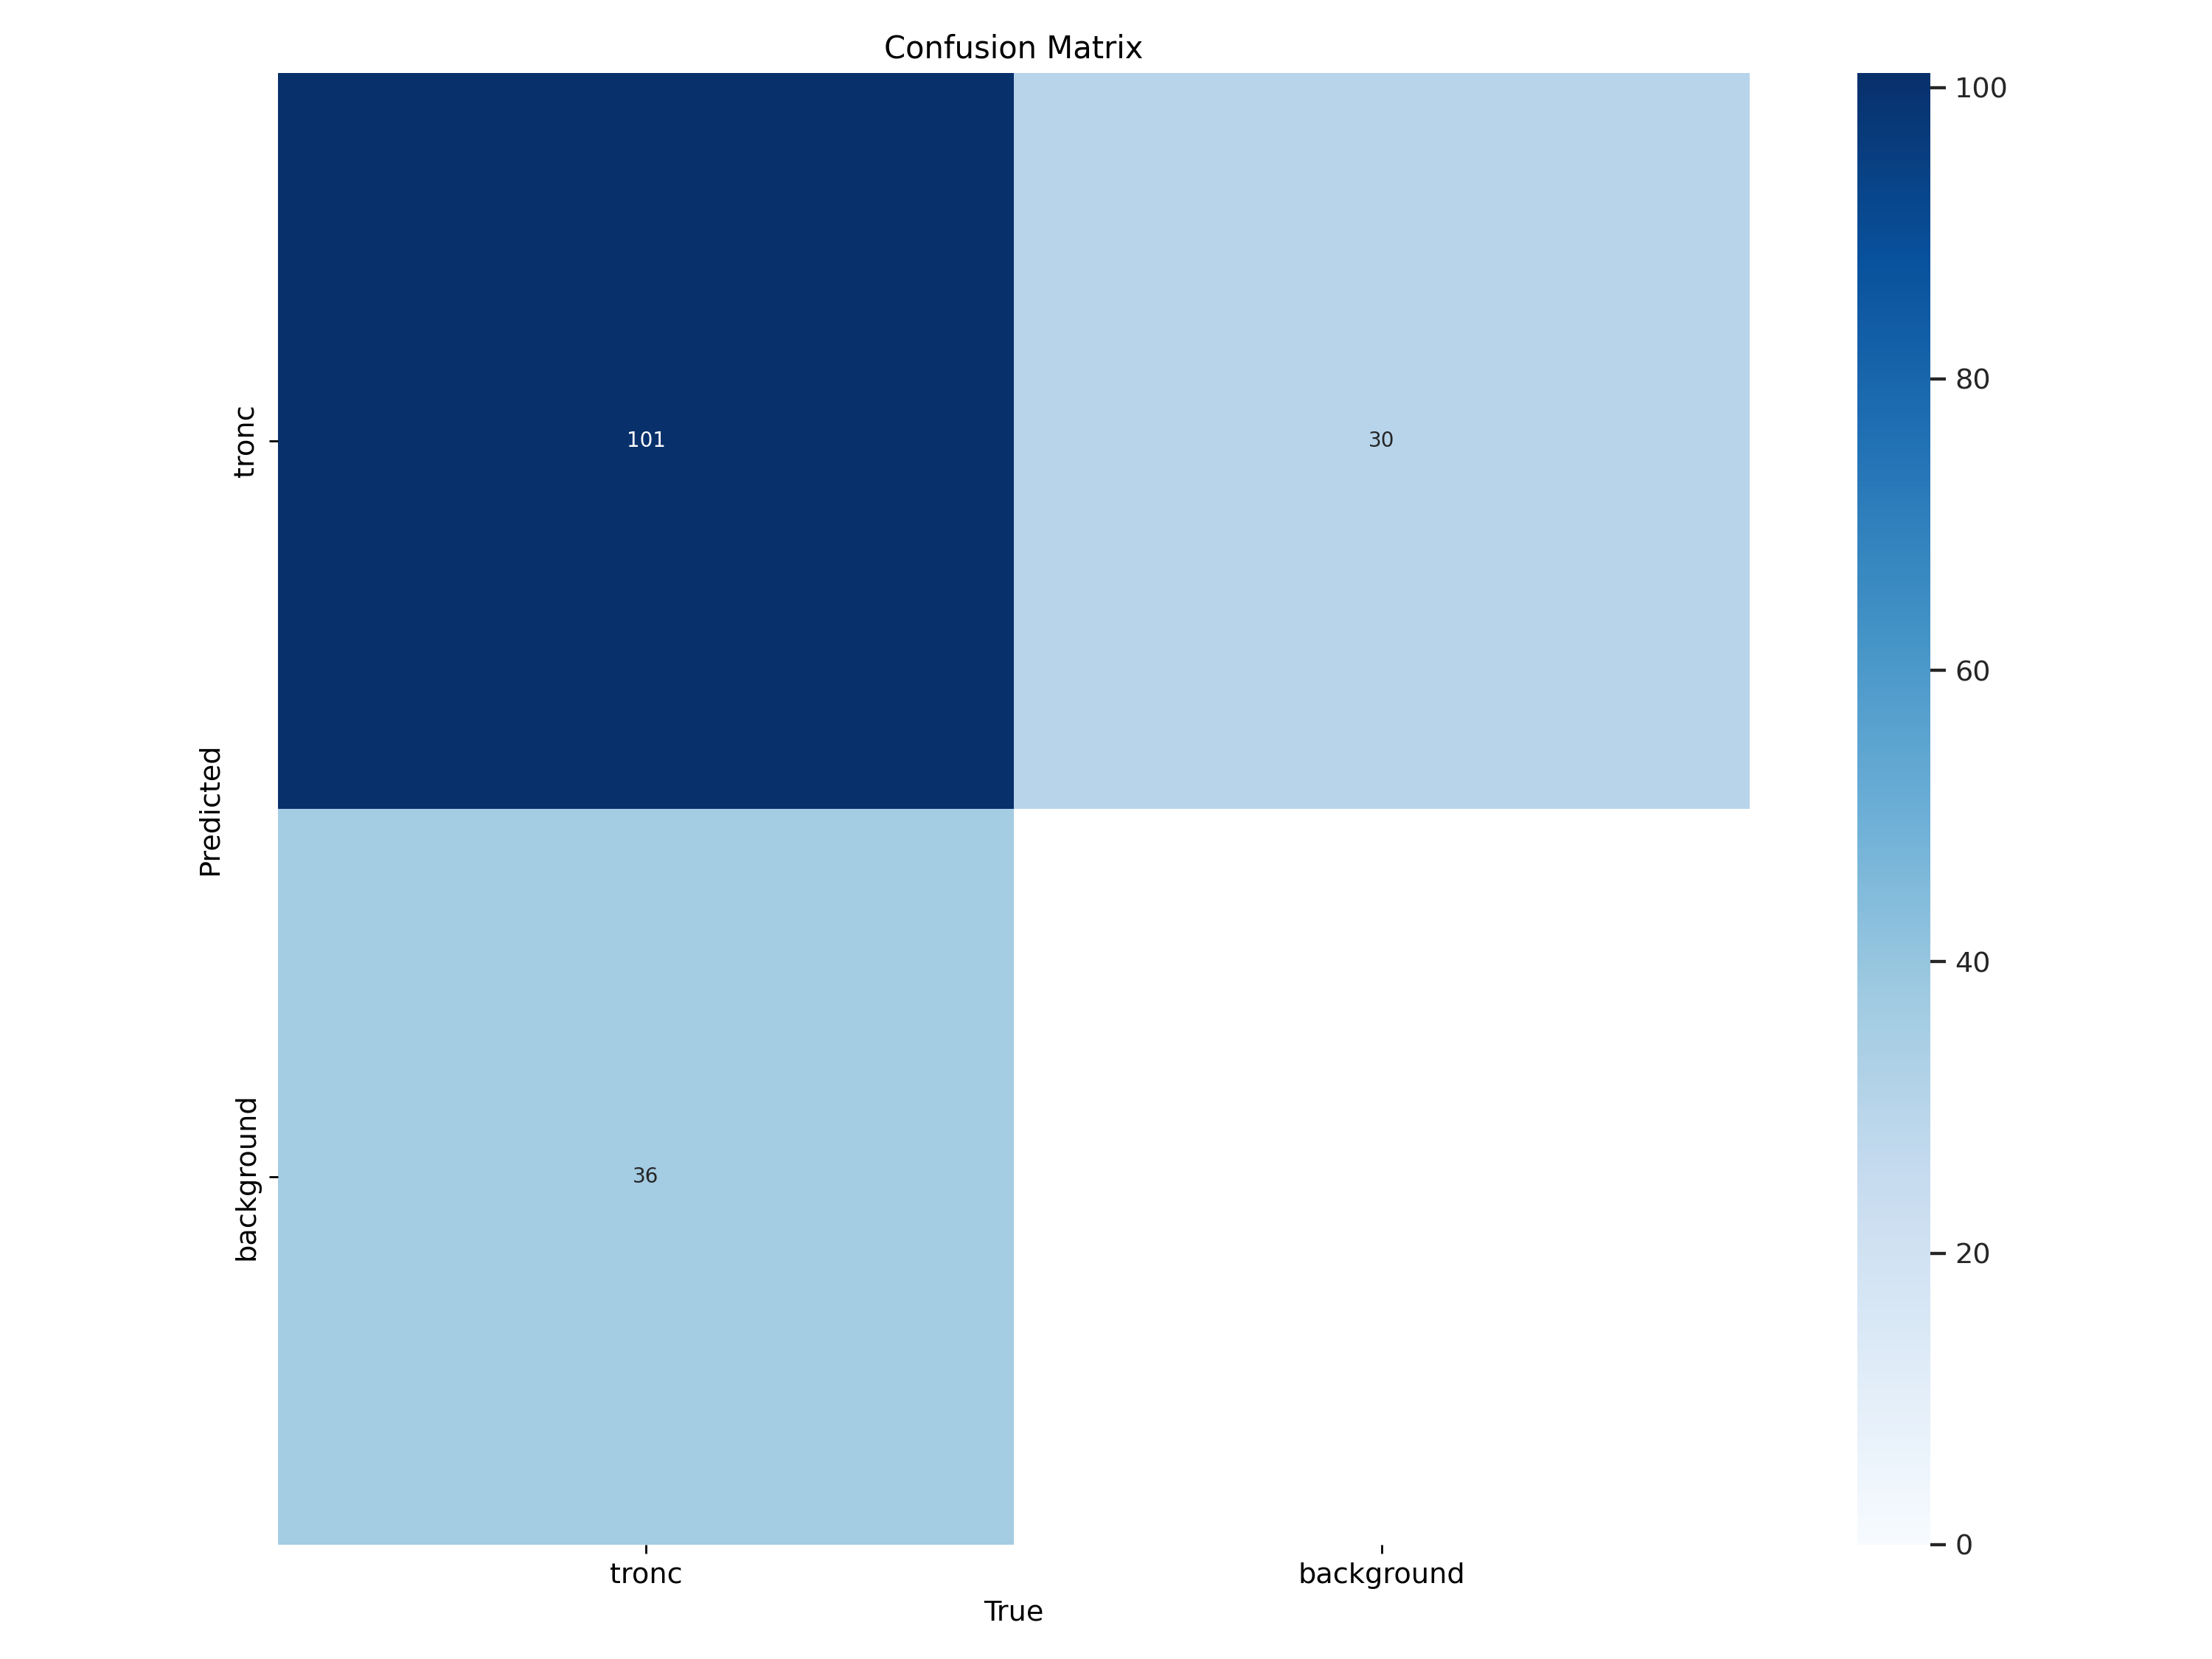

In [32]:
Image(filename='/workspace/stage1A/imane_test/ultralytics/runs/segment/train14/confusion_matrix.png', width=600)

In [33]:
%cd /workspace/stage1A/imane_test
!yolo task=segment mode=val model=/workspace/stage1A/imane_test/ultralytics/runs/segment/train14/weights/best.pt data={dataset.location}/data.yaml

/workspace/stage1A/imane_test
Ultralytics 8.3.65 🚀 Python-3.10.12 torch-2.4.0a0+f70bd71a48.nv24.06 CUDA:0 (NVIDIA RTX A5000, 24240MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /workspace/stage1A/imane_test/datasets/tronc-p3-6/valid/labels.cac
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         37        137       0.78      0.686      0.729      0.365      0.663      0.577      0.619       0.29
Speed: 3.2ms preprocess, 9.3ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to /workspace/stage1A/imane_test/ultralytics/runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [40]:
%cd /workspace/stage1A/imane_test

!yolo task=segment mode=predict model=/workspace/stage1A/imane_test/ultralytics/runs/segment/train14/weights/best.pt conf=0.25 source='{dataset.location}/test/images' save=True


/workspace/stage1A/imane_test
Ultralytics 8.3.65 🚀 Python-3.10.12 torch-2.4.0a0+f70bd71a48.nv24.06 CUDA:0 (NVIDIA RTX A5000, 24240MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs

image 1/18 /workspace/stage1A/imane_test/datasets/tronc-p3-6/test/images/14_Color_png.rf.d40f54977ded3c1c74ea7e3000253ad7.jpg: 640x640 1 tronc, 4.7ms
image 2/18 /workspace/stage1A/imane_test/datasets/tronc-p3-6/test/images/20_Color_png.rf.010775f453cc910b82b9702232084016.jpg: 640x640 5 troncs, 5.4ms
image 3/18 /workspace/stage1A/imane_test/datasets/tronc-p3-6/test/images/21_Color_png.rf.e8d1e07894cacb12a682758a9f761c09.jpg: 640x640 1 tronc, 4.9ms
image 4/18 /workspace/stage1A/imane_test/datasets/tronc-p3-6/test/images/25_Color_png.rf.8d4d1ca8dc35e4d064ff9333f326ce84.jpg: 640x640 2 troncs, 4.6ms
image 5/18 /workspace/stage1A/imane_test/datasets/tronc-p3-6/test/images/28_Color_png.rf.6234e49cc302efc6a3b017506c704641.jpg: 640x640 2 troncs, 4.7ms
image 6/18 /workspace/